# Homework 4: Data Visualization
- **Name**:  Forough Mahpouya
- **UB Username**: foroughm
- **UB Person Number**:  50469077

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [1]:
#Import Libreries

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

<IPython.core.display.Javascript object>


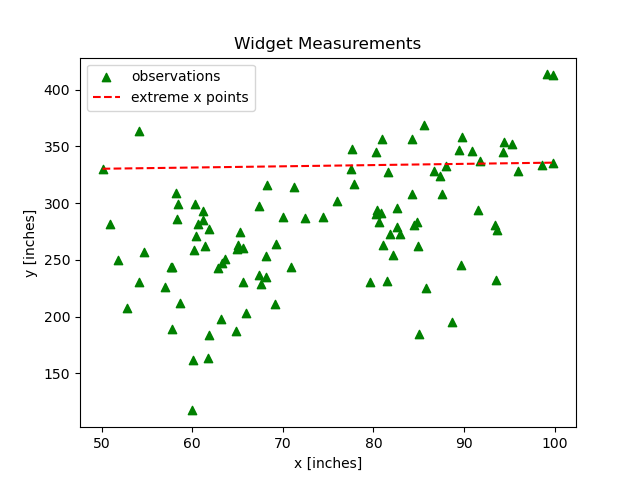

In [2]:
# Load the CSV file, ignoring rows starting with "%"
df = pd.read_csv('scatter_data.csv', comment='%', header=None)

# Extract x and y values
x = df.iloc[:, 0]  # Accessing the first column as x-coordinate
y = df.iloc[:, 1]  # Accessing the second column as y-coordinate

# Scatter plot with green triangles
plt.scatter(x, y, color='green', marker='^', label='observations')

# Find left-most and right-most points
leftmost_point = (x.min(), y[x.idxmin()])
rightmost_point = (x.max(), y[x.idxmax()])

# Draw a red dashed line
plt.plot([leftmost_point[0], rightmost_point[0]], [leftmost_point[1], rightmost_point[1]], 'r--', label='extreme x points')

# Add title and labels
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# Add legend
plt.legend()

In [3]:
plt.close()

### Problem 2 - Histogram

<IPython.core.display.Javascript object>


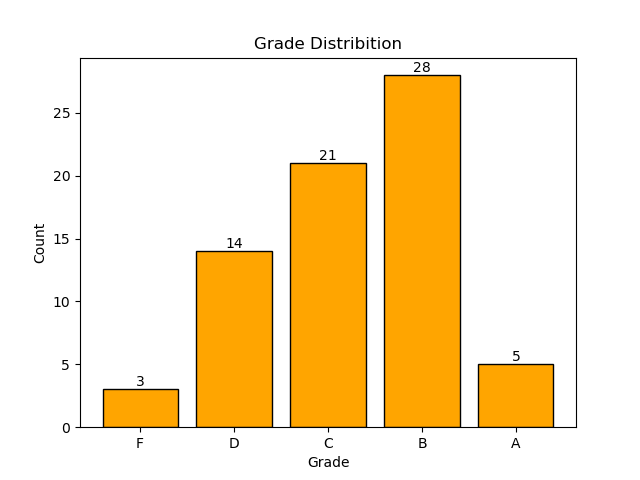

Text(0, 0.5, 'Count')

In [4]:
#Import Libreries

import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("student_grades.csv", comment='%', header=None)

# Assign labels to the bins
BINS = [0, 60, 70, 80, 90, 100]
LABELS = [1, 2, 3, 4, 5]

# Use pd.cut to categorize scores into grade bins excluding nan values
grade = pd.cut(df[1], bins=BINS, labels=LABELS, right=False)
grade = grade.dropna().astype(int).tolist()

# Create the histogram using plt.hist
counts, edges, bars=plt.hist(grade, bins=[1,2,3,4,5,6], align='left', rwidth=0.8, edgecolor='black', color='orange')

# Set xticks and xticklabels based on labels order
plt.bar_label(bars)
plt.xticks(range(1, 6), ['F', 'D', 'C', 'B', 'A'])

# Set labels and title
plt.title ('Grade Distribition')
plt.xlabel("Grade")
plt.ylabel("Count")

In [5]:
plt.close()

### Problem 3 - Barplot and Boxplot in the Same Figure

In [6]:
#Import Libreries

import matplotlib.pyplot as plt
import pandas as pd


# Read the data from the CSV file
data = pd.read_csv('solution_data.csv',comment='%', header=None, names=['Problem ID', 'Approach', 'OFV'])

# Calculate the optimality gap for each heuristic for each problem type
optimal_ofv = data[data['Approach'] == 'optimal'].set_index('Problem ID')['OFV']

# Create a function to calculate optimality gap
def calculate_optimality_gap(row):
    return ((optimal_ofv[row['Problem ID']] - row['OFV']) / optimal_ofv[row['Problem ID']]) * 100

data['Optimality Gap'] = data.apply(calculate_optimality_gap, axis=1)

In [7]:
# Filter out rows where Approach is not 'optimal'
heuristic_data = data[data['Approach'] != 'optimal']

# Group the data by Approach (heuristic) and calculate the average Optimality Gap
average_optimality_gap = heuristic_data.groupby('Approach')['Optimality Gap'].mean()

<IPython.core.display.Javascript object>


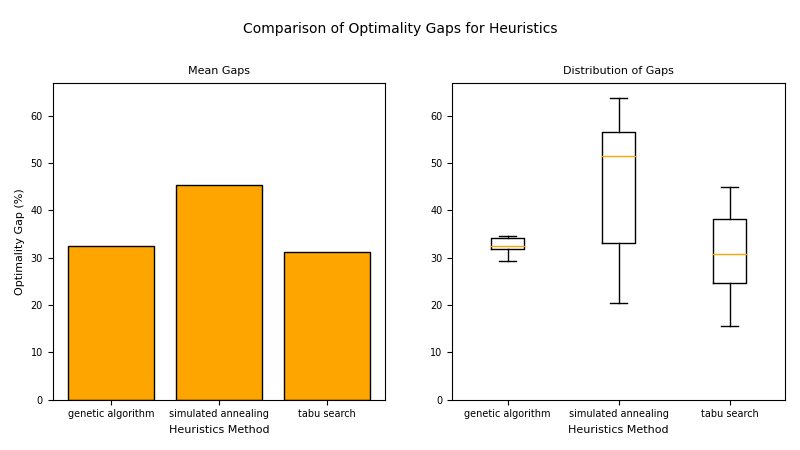

In [8]:
# Create a figure with two subplots, scaling the y-axis, and adjust figure size
fig, ( ax1 , ax2 ) = plt.subplots(1, 2, figsize=(8, 4.5), sharey=True)


# Plot the barplot in the first subplot (ax1)
average_optimality_gap = heuristic_data.groupby('Approach')['Optimality Gap'].mean() # Calculate the mean of optimality gap over each approach
ax1.bar(average_optimality_gap.index, average_optimality_gap.values, color='orange', 
        edgecolor='black', linewidth=1)             # draw bar chart
ax1.set_xlabel('Heuristics Method', fontsize= 8)    # Set label for x-axis and adjust its font size
ax1.set_ylabel('Optimality Gap (%)', fontsize= 8)   # Set label for y-axis and adjust its font size
ax1.set_title('Mean Gaps', fontsize= 8)             # Set the title and adjust font size
ax1.tick_params(axis='x',  labelsize=7)             # Adjust x-axis tick label font size
ax1.tick_params(axis='y',  labelsize=7)             # Adjust y-axis tick label font size

# Plot the boxplot in the second subplot (ax2)
boxplot_data = [heuristic_data[heuristic_data['Approach']=='genetic algorithm']['Optimality Gap'],
                heuristic_data[heuristic_data['Approach']=='simulated annealing']['Optimality Gap'],
                heuristic_data[heuristic_data['Approach']=='tabu search']['Optimality Gap']]
ax2.boxplot(boxplot_data, labels=['genetic algorithm', 'simulated annealing', 'tabu search'], 
               medianprops={'color': 'orange'})         # Draw box plot with median on orange line
ax2.set_xlabel('Heuristics Method', fontsize= 8)        # Set label for x-axis and adjust its font size
ax2.set_title('Distribution of Gaps', fontsize= 8)      # Set the title and adjust font size
ax2.tick_params(axis='x',  labelsize=7)                 # Adjust x-axis tick label font size
ax2.tick_params(axis='y', labelleft=True, labelsize=7)  # Adjust y-axis tick label font size

# Set figure title above subplots
fig.suptitle('Comparison of Optimality Gaps for Heuristics', y=0.95, fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Increase top margin
plt.subplots_adjust(wspace=0.2)  # Adjust wspace (horizontal space) between subplots


In [9]:
plt.close()

--- 
## Part 2 - Explore New Plot Types

The dataset of **City/ZIP/County/FIPS - Quality of Life (US)** provides in-depth characteristics of cities, quality of life and school systems at the City, County, and State levels across the United States.

This homework is using **'QOL(County Level).csv'** file to investigate the correlation between the mean unemployment rate and the percentage of good Air Quality Index (AQI) readings in different states across the US. 

In this regard for **'States'** and their **'Counties'** the  **'unemployment rate'** and **'AQI % Good'** are extracted from datafram and the mean of them is calculated for each state over the counties. Then a **confidence ellipse** of the two-dimensional dataset is drawn using its pearson correlation coefficient.

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
- **URL of Sample Data**:  https://www.kaggle.com/datasets/zacvaughan/cityzipcountyfips-quality-of-life/

In [10]:
#Import Libreries

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


In [11]:
# Load the dataset
df = pd.read_csv('QOL(County Level).csv')

# Extract the desired columns
selected_columns = df[['LSTATE', 'NMCNTY', 'Unemployment', 'AQI%Good']]

#print(selected_columns)

# Convert 'Unemployment' and 'AQI%Good' to numeric
selected_columns['Unemployment'] = selected_columns['Unemployment'].str.rstrip('%').astype('float') / 100.0
selected_columns['AQI%Good'] = selected_columns['AQI%Good'].str.rstrip('%').astype('float') / 100.0

# Group the data by "LSTATE" sstate level
grouped_data = selected_columns.groupby('LSTATE')

# Calculate the mean for 'Unemployment' and 'AQI%Good' for each state
state_means = grouped_data[['Unemployment', 'AQI%Good']].mean()

C:\Users\foroughm\AppData\Local\Temp\ipykernel_22880\3654868311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Unemployment'] = selected_columns['Unemployment'].str.rstrip('%').astype('float') / 100.0
C:\Users\foroughm\AppData\Local\Temp\ipykernel_22880\3654868311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['AQI%Good'] = selected_columns['AQI%Good'].str.rstrip('%').astype('float') / 100.0


In [12]:
# Define the confidence ellipse function

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

<IPython.core.display.Javascript object>


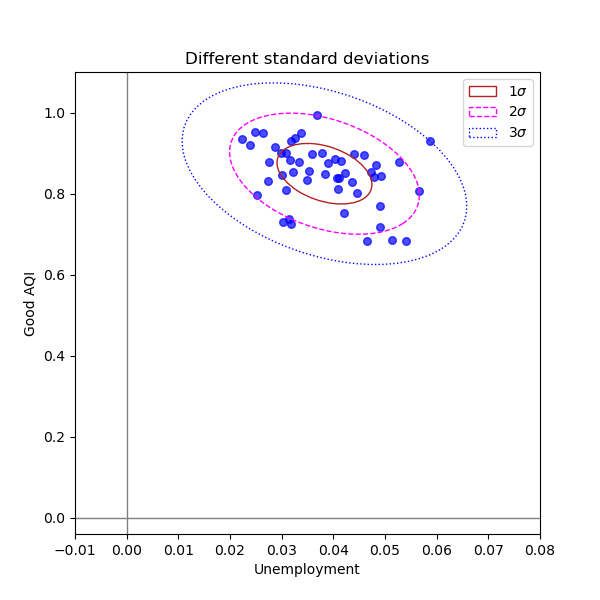

(-0.04, 1.1)

In [13]:
# create a figure with a 6x6 inch size
fig, ax = plt.subplots(figsize=(6, 6))

# Draw meanpont of variables using scatter pot
x = state_means['Unemployment']
y = state_means['AQI%Good']
ax.scatter(x, y, s=30, color='blue', alpha=0.7)

# Specify the axix
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

# Draw confidence ellipse using defined function
confidence_ellipse(x, y, ax, n_std= 1, label=r'$1\sigma$', edgecolor='firebrick') # Confidence for one standard deviation
confidence_ellipse(x, y, ax, n_std=2, label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')  # Confidence for two standard deviation              
confidence_ellipse(x, y, ax, n_std=3, label=r'$3\sigma$', edgecolor='blue', linestyle=':') # Confidence for three standard deviation
                   

# Add title, labels and legend
ax.set_title('Different standard deviations')
ax.set_xlabel("Unemployment")
ax.set_ylabel("Good AQI")
ax.legend()

# Manually adjust limits for x and y axes
ax.set_xlim(-0.01, 0.08)
ax.set_ylim(-0.04, 1.1)


In [14]:
print(ax)

Axes(0.125,0.11;0.775x0.77)


The most important part in this study is the objective that you are  planning to figure out and if your data will applicable for this objective.

* Preaper your two-dimensional aming to find pearson correlation coefficient 
* Create a plot of the covariance confidence ellipse of x and y using its function: confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs) In this function, parameters are as follows:


     * **x, y : array-like, shape (n, )** --> Input data.
     * **ax : matplotlib.axes.Axes** --> The axes object to draw the ellipse into.
     * **n_std : float** --> The number of standard deviations to determine the ellipse's radiuses.
     * ****kwargs** --> Forwarded to `~matplotlib.patches.Ellipse`
     
     
* Draw scatter plot on your data       
* Specify the axisto have an outlook on position of your plot